In [ ]:
import tempfile
tempdir = tempfile.gettempdir()

#**Random Fuzzy Number Generator**





In [ ]:
#!pip install portion

In [ ]:
#import portion as P
from random import random as rm
import math

# Alpha-cut based (for unimodal Fuzzy Numbers)
From "Fuzzy Uncertainty in Random Variable Generation: An a-Cut Approach", by Christian Alfredo Varón-Gaviria, José Luis Barbosa-Fontecha, and Juan Carlos Figueroa-García

In [ ]:
def build_triangular_mf(a, b, c):
  if a > b or b > c:
    raise ValueError("Parameters must form a nondecreasing sequence")
  return lambda x: (x-a)/(b-a) if a <= x < b else (c - x)/(c - b) if b <= x < c else 0

def build_sampleable_triangular_mf(a, b, c):
  if a > b or b > c:
    raise ValueError("Parameters must form a nondecreasing sequence")
  Lambda1 = (b - a) / 2
  Lambda2 = (c - b) / 2
  Lambda = (c - a) / 2

  lambda1 = Lambda1 / Lambda
  lambda2 = Lambda2 / Lambda

  return lambda u1, u2: u1 * (b - a) + a if u2 <= lambda1 else c - u1 * (c - b)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

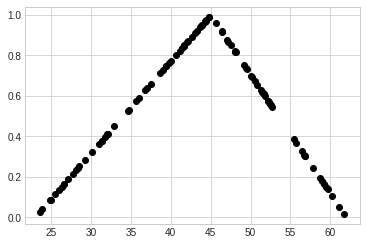

In [ ]:
n = 100

sampler = build_sampleable_triangular_mf(23, 45, 62)
mf = build_triangular_mf(23, 45, 62)
x = [sampler(rm(), rm()) for i in range(n)]
y = [mf(u) for u in x]
plt.plot(x, y, 'o', color='black')

# Cumulative membership function-based
From "Fuzzy Uncertainty in Random Variable Generation: A Cumulative Membership
Function Approach", by Diana Giseth Pulido-L´opez, Mabel García, and Juan Carlos Figueroa-García

In [ ]:
def build_trapezoidal_mf(a, b, c, d):
  if a > b or b > c or c > d:
    raise ValueError("Parameters must form a nondecreasing sequence")
  return lambda x: (x-a)/(b-a) if a <= x < b else 1 if b <= x < c else (d - x)/(d - c) if c <= x < d else 0

def build_sampleable_trapezoidal_mf(a, b, c, d):
  if a > b or b > c or c > d:
    raise ValueError("Parameters must form a nondecreasing sequence")
  Lambda1 = (b - a) / 2
  Lambda2 = c - b
  Lambda3 = (d - c) / 2
  Lambda = (c + d - a - b) / 2

  lambda1 = Lambda1 / Lambda
  lambda2 = Lambda2 / Lambda
  lambda3 = Lambda3 / Lambda

  return lambda u: a + math.sqrt((b - a) * 2 * u * Lambda) if u <= lambda1 else u * Lambda + b - Lambda1 if u <= (lambda1 + lambda2) else d - math.sqrt((d - c)**2 - 2 * (d - c) * (u * Lambda - Lambda1 - Lambda2))


In [ ]:
sampler = build_sampleable_trapezoidal_mf(23, 45, 62, 98)
mf = build_trapezoidal_mf(23, 45, 62, 98)

for j in range(100):
  r = sampler(rm())
  print("({}, {})".format(r, mf(r)))

(58.948035711210224, 1)
(29.910895894054242, 0.3141316315479201)
(67.291787306826, 0.8530059081437223)
(33.04360879630299, 0.4565276725592268)
(83.48196632379026, 0.4032787132280483)
(37.83709669385343, 0.6744134860842469)
(42.857409144504786, 0.9026095065683993)
(59.66462482321444, 1)
(47.10716989101542, 1)
(50.24441930645341, 1)
(57.055655740095716, 1)
(36.34383189669101, 0.6065378134859549)
(80.89993965161568, 0.4750016763440088)
(59.64738501283911, 1)
(62.520570087315384, 0.9855397197967949)
(46.31019201040909, 1)
(70.99822690006549, 0.7500492527759586)
(65.09973084296342, 0.9138963654732382)
(69.58835678228205, 0.7892123116032764)
(38.862964174308374, 0.7210438261049261)
(67.6457874163782, 0.8431725717672722)
(69.30874687853708, 0.79697925337397)
(84.0915394790308, 0.3863461255824778)
(35.246540807406916, 0.5566609457912235)
(62.13355960081341, 0.9962900110885163)
(43.955023544598575, 0.9525010702090261)
(40.36443416319827, 0.7892924619635576)
(55.64868585532291, 1)
(51.0812055922

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

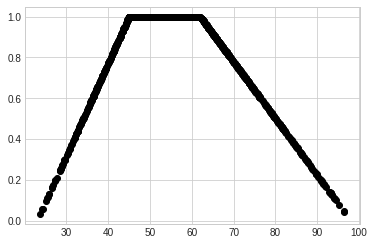

In [ ]:
n = 1000
x = [sampler(rm()) for i in range(n)]
y = [mf(u) for u in x]
plt.plot(x, y, 'o', color='black')

#**Simulación de una instancia de VRP utilizando Simpy**

Características: 

*   1 vehiculo con límite de capacidad.
*   1 depósito (inicio y fin del recorrido).
*   N clientes.
*   Se posee una estimación de las demandas de los clientes y del tiempo de recorrido entre cada uno de ellos incluído el depósito.
*   La simulación finaliza al regresar al depósito.





## Instalación e importación de librerías necesarias

In [ ]:
!pip install simpy
!pip install pandas

In [ ]:
import simpy
import random
import numpy as np
import pandas as pd

## Definicion e inicializacion de estructuras de datos



### Samplers for Random Fuzzy Number Generator

In [ ]:
##
sampler_triangular = build_sampleable_triangular_mf(0.3, 0.7, 2.0) 
##
#sampler_trapezoidal_prod_estim = build_sampleable_trapezoidal_mf(23, 35, 43, 55)
#sampler_trapezoidal_prod_pedido = build_sampleable_trapezoidal_mf(23, 35, 43, 55)
sampler_trapezoidal_prod_pedido = build_sampleable_trapezoidal_mf(30, 45, 55, 75)

In [ ]:
#sampler_trapezoidal_prod_estim(rm())
sampler_triangular(rm(),rm())

0.4592217290870883

In [ ]:
# Tabla de distancias/tiempos estimados entre los clientes, incluyendo el deposito (intervalo fuzzy)
# revisar esta tabala para generar un intervalo fuzzy !!!
carnicerias = ['Frigorifico Tres Arroyos','La Blanq y D Gaspar','La Blanquita','Rougier Carnes','La Pulperia','Granja de Rosso','La Estancia','El Buen Trato','El Ternero Gasolero','La Imbatible']
tiempos = np.array([[0, 9, 6, 4, 4, 7, 9, 10, 12, 10],
[8, 0, 5, 8, 8, 9, 9, 10, 11, 9],
[6, 6, 0, 5, 5, 5, 5, 8, 7, 5],
[4, 8, 5, 0, 1, 4, 5, 5, 7, 6],
[5, 9, 6, 3, 0, 5, 7, 6, 8, 7],
[7, 9, 6, 5, 5, 0, 4, 3, 5, 4],
[8, 9, 5, 6, 5, 2, 0, 5, 4, 2],
[9, 12, 9, 7, 6, 5, 6, 0, 5, 7],
[10, 11, 7, 8, 7, 5, 4, 3, 0, 4],
[9, 9, 6, 7, 6, 5, 3, 7, 6, 0]])
df_tiempos = pd.DataFrame(tiempos, columns=carnicerias, index=carnicerias)
df_tiempos

# Tabla de Planificacion inicial de orden de visita, con estimacion de cantidad de productos requeridos (intervalo fuzzy)
# revisar esta tabala para generar un intervalo fuzzy !!!
data_planificacion = np.array([['La Blanq y D Gaspar',1,4, 40,int(sampler_trapezoidal_prod_pedido(rm())),0],
                              ['La Blanquita',2,3, 40,int(sampler_trapezoidal_prod_pedido(rm())),0],
                              ['Rougier Carnes',3,2,40,int(sampler_trapezoidal_prod_pedido(rm())),0],
                              ['La Pulperia',4,1, 40,int(sampler_trapezoidal_prod_pedido(rm())),0],
                              ['Granja de Rosso',5,5,40,int(sampler_trapezoidal_prod_pedido(rm())),0],
                              ['La Estancia',6,6,40,int(sampler_trapezoidal_prod_pedido(rm())),0],
                              ['El Buen Trato',7,9,40,int(sampler_trapezoidal_prod_pedido(rm())),0],
                              ['El Ternero Gasolero',8,8,40,int(sampler_trapezoidal_prod_pedido(rm())),0],
                              ['La Imbatible',9,7,40,int(sampler_trapezoidal_prod_pedido(rm())),0]])
df_planificacion =  pd.DataFrame(data_planificacion, columns=['cliente','idCliente','orden','productosEstimados','productosPedidos','productosRecibidos'])
df_planificacion

# Tabla de "registro de viaje": orden de visita real, confirmacion de atencion, duracion del viaje, tiempos de llegada, tiempo de atencion, cantidad de pedido real (en el momento), cantidad de productos realmente entregados
#data_viaje = np.array([0,0,0,0,0,0,0,0]) # se cargaria durante la simulacion
df_viaje =  pd.DataFrame( columns=['Cliente','orden_visita_real','duracion_viaje','tiempo_llegada','duracion_espera','posponer','tiempo_atencion','pedido','duracion_atencion','entregar','entregado'])
df_viaje

# Vehiculos (capacidad, prod disp, prod entregados, tiempos/dist recorrida... )
capacity_vehicle_1 = 450
available_products_vehicle_1 = 410
warehouse_vehicle_1 = 'Frigorifico Tres Arroyos' #ubicacion inicial
current_time=''
current_event= ''
current_location = warehouse_vehicle_1


## Implementación de la clase 'Vehicle'

Esta clase define e implementa la lógica de la simulación.

In [ ]:
class Vehicle(object):
    def __init__(self, env, capacity, available_products, times_map, planning, trip_log, warehouse):
        self.env = env
        #self.vehicle = simpy.Resource(env, num_vehicles)
        self.available_products = available_products
        self.travel_time = 0
        self.times_map = times_map.copy()
        self.planning = planning.sort_values('idCliente') #.set_index('orden')
        self.trip_log = trip_log
        self.clients_inorder = planning.sort_values('orden')[['cliente','orden']].set_index('orden')
        self.warehouse = warehouse
        self.current_location = warehouse
        self.customers_visited = 0
        self.current_event= ''
        self.current_time=''
        self.current_customerId = None
        self.cancel = 0
        self.next_customer = 1
        self.max_viajes = len(self.planning.index) * 2
        self.times_map_slow = self.times_map.copy()
        self.times_map_slow[['Frigorifico Tres Arroyos','La Blanquita','La Pulperia','Granja de Rosso','El Ternero Gasolero']] = 4* self.times_map_slow[['Frigorifico Tres Arroyos','La Blanquita','La Pulperia','Granja de Rosso','El Ternero Gasolero']]
        self.times_map_slow[['La Blanq y D Gaspar','Rougier Carnes','La Estancia','El Buen Trato','La Imbatible']] = 1.5 * self.times_map_slow[['La Blanq y D Gaspar','Rougier Carnes','La Estancia','El Buen Trato','La Imbatible']]

    def set_next_customer(self, id_customer): 
        self.next_customer = id_customer

    def run (self,env):      
        initial_time = env.now
        self.current_event = 0 #'inicio'

        # print('Inicio de run')

        #realizar el recorrido visitando los clientes (mientras el próximo viaje no sea volver al depósito)
        trip_number=0
        while (self.next_customer!=0 and trip_number<self.max_viajes):
          self.cancel = 0
          trip_number += 1
          self.current_customerId = self.next_customer
          customer= self.planning.set_index('idCliente').at[str(self.current_customerId),"cliente"]

          yield self.env.process(self.travel_next_customer(customer))

          #En esta version no se considera la espera
          #yield self.env.process(self.wait_customer(customer))
          if (self.cancel == 0):
            yield self.env.process(self.check_order(customer))
            yield self.env.process(self.deliver_products(customer))
          total_travel_time = env.now - initial_time
          #yield self.env.timeout(1)
          
        #volver al deposito
        trip_duration = self.times_map.loc[self.current_location].loc[self.warehouse] #tiempo de viaje desde la ubicacion actual al deposito
        yield self.env.timeout(trip_duration)
        self.current_event = 6 #'fin'
        total_travel_time = self.env.now - initial_time


    def travel_next_customer(self, customer): 
        initial_travel_time = self.env.now

        #print('Viajando a %s' % customer)

        # Generar el tiempo de viaje desde la ubicacion actual al proximo cliente
        if (self.env.now<120):
          travel_time = self.times_map.loc[self.current_location].loc[customer] #tiempo de viaje desde la ubicacion actual al proximo cliente
        else:
          travel_time = self.times_map_slow.loc[self.current_location].loc[customer] #tiempo de viaje desde la ubicacion actual al proximo cliente

        #yield self.env.timeout(random.randint(1, 3)) 
        yield self.env.timeout(travel_time) 
        
        #print('Arribo a %s' % customer)
       
        self.customers_visited = self.customers_visited + 1
        self.current_event = 1 # ('travel-'+str(self.customers_visited+1))

        # Geenrar estimacion de espera / En esta version no se considera la espera
        #wait_estimated = random.uniform(1,5)  # Revisar distribucion
        wait_estimated = 0

        # Crear el registro en trip_log
        #'Cliente','orden_visita_real','duracion_viaje','tiempo_llegada','duracion_espera','posponer','tiempo_atencion','pedido','duracion_atencion','entregar','entregado'
        self.trip_log.loc[self.customers_visited] = (customer, self.customers_visited, travel_time, self.env.now, wait_estimated,0,0,0,0,0,0)

        #Actualizar la ubicacion y la hora actual
        current_location = customer
        self.current_time= self.env.now

    def wait_customer(self, customer):   # ver como modificarlo para que pueda haber una consulta/decision
        if (self.trip_log.at[self.customers_visited, 'posponer'] == 0):         
          #print('Esperando en %s' % customer)
          yield self.env.timeout(self.trip_log.at[self.customers_visited, 'duracion_espera'])  
          self.current_event = 2 #'wait-'+str(self.customers_visited)        
        else:
          # se saltea el cliente por lo que hay que modificar la planificacion para volver luego
          #print('Espera cancelada de %s' % customer)
          self.cancel == 1
          self.current_event = 3 #'salteado-'+str(self.customers_visited)

          #actualizar la planificacion - POR EL MOMENTO SE ENVIA AL CLIENTE AL FINAL DE LA COLA
          nuevaVisita = self.planning.set_index('orden').iloc[self.customers_visited]
          self.planning=self.planning.append(nuevaVisita,ignore_index=True)
          self.planning.at[self.planning.shape[0]-1, 'orden'] = self.planning.shape[0]

        self.current_time= self.env.now

    def check_order(self, customer): 
        #print('Consultando pedido en %s' % customer)

        pedido_inicial = int(self.planning.set_index('idCliente').at[str(self.current_customerId),"productosPedidos"])
        recibido_actual = int(self.planning.set_index('idCliente').at[str(self.current_customerId),"productosRecibidos"])
        pedir = pedido_inicial - recibido_actual
        
        self.trip_log.at[self.customers_visited, 'pedido'] = pedir

        yield self.env.timeout(1/60)

        self.current_event = 4 #'check_order-'+str(self.customers_visited)

        self.current_time= self.env.now




    def deliver_products(self, customer):  
        # Entregar productos, registrar y actualizar variables
        #print('Despachando productos en %s' % customer)

        entregar = int(self.trip_log.at[self.customers_visited, 'entregar'])
        if (entregar>self.available_products):
          entregar = self.available_products

        deliver_time = entregar * sampler_triangular(rm(),rm())

        self.available_products = self.available_products - entregar
        self.trip_log.at[self.customers_visited, 'duracion_atencion'] = deliver_time
        self.trip_log.at[self.customers_visited, 'entregado'] = entregar

        recibido_ant = int(self.planning.set_index('idCliente').at[str(self.current_customerId),"productosRecibidos"])
        #print('recibido_ant: ',recibido_ant)
        #print('entregar: ',entregar)
        self.planning.at[self.current_customerId,"productosRecibidos"] = recibido_ant + entregar
        #print('recibido_ant + entregar: ',recibido_ant + entregar)

        yield self.env.timeout(abs(deliver_time))

        self.current_event = 5  #'deliver_products-'+str(self.customers_visited)
        self.current_time= self.env.now

        #print('Productos disponibles: ')
        #print(self.available_products)


______________________________
# **Ensamble en un Python Environment de TF-Agents**

Ensamble de la simulación de la instancia VRP en un Python Environment de TF-Agents

## Instalación e importación de librerías necesarias

In [ ]:
#!pip install --upgrade pip
#!pip install --upgrade tensorflow
!pip install tf-agents

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import abc
import tensorflow as tf
#import numpy as np

from tf_agents.environments import py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.specs import array_spec
#from tf_agents.environments import wrappers
#from tf_agents.environments import suite_gym
from tf_agents.trajectories import time_step as ts

In [ ]:
df_viaje

,Cliente,orden_visita_real,duracion_viaje,tiempo_llegada,duracion_espera,posponer,tiempo_atencion,pedido,duracion_atencion,entregar,entregado
1,La Blanq y D Gaspar,1,9,9,0,0,0,0,0,0,0



## Implementación de la clase 'TSPEnv'

Esta clase implementa un entorno para aprendizaje por refuerzo utilizando la API de PyEnvironment de la librería TF-Agents.



In [ ]:

class TSPEnv(py_environment.PyEnvironment):

  def __init__(self, planning, estimated_time, reward_discount=1.1):

    self.planning = planning
    self.estimated_time = estimated_time
    self.reward_discount = reward_discount
    self.customers = len(self.planning.index)

    #Componentes de la acción/decisión:
    #1- Define la cantidad de productos a entregar a un cliente. Opciones: 0:no entregar; 1:entregar solo lo estimado;  2:entregar lo solicitado
    #2- Define el proximo destino
    self._action_spec = array_spec.BoundedArraySpec(
        shape=(2,), dtype=np.int32, minimum=[0,0], maximum=[2,self.customers], name='action')
    
    #Datos que debería ver el agente en cada paso:
    #-#1- Evento:
        #0: Inicio del recorrido
        #1: llegada al cliente
        #2: termina espera y es atendido
        #3: cliente salteado (indica cómo reorganiza??)
        #4: pedido registrado
        #5: entrega realizada
        #6: llegada a deposito. FIN
    #2- Número del Cliente actual
    #3- Tiempo actual
    #4- Mercadería disponible
    #5- Pedido del cliente (si corresponde, sino 0)
    #-#6- Cantidad entregada (si corresponde, sino 0)
    self._observation_spec = array_spec.BoundedArraySpec(
        shape=(4,), dtype=np.float32, minimum=0, name='observation')
    
    self.env = simpy.Environment()
    self.vehicle = Vehicle(self.env, capacity_vehicle_1, available_products_vehicle_1, df_tiempos, self.planning, df_viaje, warehouse_vehicle_1)
    
    #self._state = np.array([0,0,0,self.vehicle.available_products,0,0])
    self._state = [0,0,self.vehicle.available_products,0]
    self._episode_ended = False
    self.old_event = self.event = self.new_event= None

  def action_spec(self):
    return self._action_spec

  def observation_spec(self):
    return self._observation_spec


  def reward_spec(self): 
    """Defines the rewards that are returned by `step()`.
    Override this method to define an environment that uses non-standard reward
    values, for example an environment with array-valued rewards.
    Returns:
      An `ArraySpec`, or a nested dict, list or tuple of `ArraySpec`s.
    """
    return array_spec.ArraySpec(shape=(), dtype=np.float32, name='reward')


  def time_step_spec(self) -> ts.TimeStep:
    """Describes the `TimeStep` fields returned by `step()`.
    Override this method to define an environment that uses non-standard values
    for any of the items returned by `step()`. For example, an environment with
    array-valued rewards.
    Returns:
      A `TimeStep` namedtuple containing (possibly nested) `ArraySpec`s defining
      the step_type, reward, discount, and observation structure.
    """
    return ts.time_step_spec(self.observation_spec(), self.reward_spec())


  def _reset(self):
    # Resetea la simulacion y ejecuta el paso inicial
    self.env = simpy.Environment()
    self.vehicle = Vehicle(self.env, capacity_vehicle_1, available_products_vehicle_1, df_tiempos, self.planning, df_viaje, warehouse_vehicle_1)
    self.env.process(self.vehicle.run(self.env))
    self.env.step()
    self.event = self.new_event = self.vehicle.current_event

    # Actualiza el estado y devuelve la observacion inicial
    #self._state = np.array([0,0,0,self.vehicle.available_products,0,0])
    self._state = [0,0,self.vehicle.available_products,0]
    self._episode_ended = False
    return ts.restart(np.array(self._state, dtype=np.float32),reward_spec=array_spec.ArraySpec(shape=(), dtype=np.float32))




  def _step(self, action):

    action = tf.cast(action, tf.int32)
    action = action.numpy()
    self.old_event = self.event
    current_customer = self.vehicle.current_customerId
    next_customer = action[1]

    if self._episode_ended:
      # The last action ended the episode. Ignore the current action and start
      # a new episode.
      return self.reset()

    # Make sure episodes don't go on forever.
    if self.vehicle.current_event == 6:
      self._episode_ended = True

    else:
      #print('acciones: ',action[0],'  ',action[1],' evento actual: ',self.vehicle.current_event)
      if self.vehicle.current_event == 4: # DEFINIR CANTIDAD A ENTREGAR
        if (action[0] == 0): #NADA
          entregar = 0
        elif (action[0] == 1): # solo la mitad de lo que pide  ##OLD:  SOLO LO ESTIMADO
          #copy_planing = self.vehicle.planning.copy()
          #entregar = copy_planing.sort_values('idCliente').at[self.vehicle.current_customerId-1, 'productosEstimados']
          entregar = int(self.vehicle.trip_log.at[self.vehicle.customers_visited, 'pedido'])
          entregar = entregar/2
        else: # TODO LO QUE PIDIÓ
          entregar = int(self.vehicle.trip_log.at[self.vehicle.customers_visited, 'pedido'])
        self.vehicle.trip_log.at[self.vehicle.customers_visited, 'entregar'] = entregar

      elif (self.vehicle.current_event == 5 or self.vehicle.current_event == 0):
        #Definir a que cliente viaja o si termina el recorrido
        self.vehicle.set_next_customer(action[1])

      #AVANZAR sim HASTA PROXIMO EVENTO
      until = 1000000
      while (self.event == self.new_event or self.new_event == 1) and (self.env.peek() < until): # "env.peek() < until" controla que no haya llegado al fin la ejecucion (peek da el tiempo del proximo evento)
           self.env.step()
           self.new_event= self.vehicle.current_event
      self.event = self.new_event

      #ACTUALIZAR EL ESTADO EL ENTORNO  [ Evento, Número del Cliente actual, Tiempo actual, Tiempo de espera estimado , Pedido del cliente, entregado ]
      #self._state = np.array([self.vehicle.current_event,self.vehicle.current_customerId,self.vehicle.current_time,self.vehicle.available_products,self.vehicle.trip_log.at[self.vehicle.customers_visited, 'pedido'],self.vehicle.trip_log.at[self.vehicle.customers_visited, 'entregado']])
      #self._state = [self.vehicle.current_event,self.vehicle.current_customerId,self.vehicle.current_time,self.vehicle.available_products,self.vehicle.trip_log.at[self.vehicle.customers_visited, 'pedido'],self.vehicle.trip_log.at[self.vehicle.customers_visited, 'entregado']]
      self._state = [self.vehicle.current_customerId,self.vehicle.current_time,self.vehicle.available_products,self.vehicle.trip_log.at[self.vehicle.customers_visited, 'pedido']]
      #print(self._state)

    # Ver si esto es necesario mas adelante
    #else:
    #  raise ValueError('`action` should be 0 or 1.')

    if self._episode_ended:

      pedido = self.vehicle.trip_log['pedido'].to_numpy(dtype=int)
      entregado = self.vehicle.trip_log['entregado'].to_numpy(dtype=int)
      
      satisfaccion = sum(pedido-entregado)
      satisfaccion = -(satisfaccion**2)

      recompensa = satisfaccion * (self.reward_discount**(self.vehicle.current_time/60)) #revisar formula

      # sumar penalizacion por clientes no visitados
      recibidos = self.vehicle.planning['productosRecibidos'].to_numpy(dtype=int)
      clientes_sin_entrega = recibidos.size - np.count_nonzero(recibidos)
      clientes_sin_entrega = clientes_sin_entrega * (-40)
      recompensa = recompensa + clientes_sin_entrega

      recompensa = (sum(entregado) + clientes_sin_entrega)

      #Descuento o aumento por tiempo transcurrido
      if (recompensa>0): recompensa = recompensa * (0.9**(self.vehicle.current_time/60)) 
      else: recompensa = recompensa * (1.1**(self.vehicle.current_time/60)) 
      
      reward = np.array(recompensa,dtype=np.float32) 

      #return ts.termination(np.array(self._state, dtype=np.float32), reward)
      return ts.TimeStep(step_type= ts.StepType.LAST, reward=reward,  discount=np.array(0.0,dtype=np.float32),  observation=np.array(self._state, dtype=np.float32))
      else:
      if (current_customer == next_customer): recompensa_cambio_cliente = -1
      else: recompensa_cambio_cliente = 1

      if (action[0] == 0): recompensa_entrega = -1
      elif (action[0] == 1): recompensa_entrega = 1
      else: recompensa_entrega = 2
      
      #si el evento era 0 o 5 la recompensa debe ser sobre la eleccion del proximo cliente
      if (self.old_event == 5 or self.old_event == 0): recompensa_entrega = 0
      #si el evento era 4 la recompensa debe ser sobre la entrega
      elif (self.old_event == 4): recompensa_cambio_cliente = 0

      recompensa_intermedios = (recompensa_cambio_cliente*10) + (recompensa_entrega*5)

      return ts.TimeStep(step_type= ts.StepType.MID, reward=np.array(recompensa_intermedios,dtype=np.float32),  discount=np.array(0.0,dtype=np.float32), observation=np.array(self._state, dtype=np.float32))

____________________
# **Agente PPO**

Implementación de un Agente PPO

## Importación de librerías necesarias



In [ ]:
#!pip install tf-agents[reverb]
#!pip install reverb
#!pip install -force-reinstall tf-agents[reverb]
#!pip install dm-reverb[tensorflow]

In [ ]:
import tensorflow as tf

from tf_agents.agents.ddpg import critic_network
from tf_agents.agents.ddpg import critic_rnn_network
from tf_agents.agents.sac import sac_agent
from tf_agents.agents.sac import tanh_normal_projection_network
from tf_agents.networks import actor_distribution_network
from tf_agents.networks import actor_distribution_rnn_network
from tf_agents.networks import nest_map
from tf_agents.networks import network
from tf_agents.networks import sequential
from tf_agents.specs import tensor_spec
from tf_agents.trajectories import policy_step
from tf_agents.trajectories import time_step as ts
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

from tf_agents.metrics import py_metrics
from tf_agents.policies import greedy_policy
from tf_agents.policies import py_tf_eager_policy
from tf_agents.policies import random_py_policy
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import reverb_replay_buffer
from tf_agents.replay_buffers import reverb_utils
from tf_agents.train import actor
from tf_agents.train import learner
from tf_agents.train import triggers
from tf_agents.train.utils import spec_utils
from tf_agents.train.utils import strategy_utils
from tf_agents.train.utils import train_utils

import os
import time

from tf_agents.agents.ppo import ppo_clip_agent
from tf_agents.agents.ppo import ppo_agent
from tf_agents.drivers import dynamic_episode_driver
from tf_agents.environments import parallel_py_environment
from tf_agents.environments import suite_mujoco
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import actor_distribution_network
from tf_agents.networks import categorical_projection_network
from tf_agents.networks import actor_distribution_rnn_network
from tf_agents.networks import value_network
from tf_agents.networks import value_rnn_network
from tf_agents.policies import policy_saver
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.replay_buffers import episodic_replay_buffer

from tf_agents.system import system_multiprocessing as multiprocessing
from tf_agents.utils import common

import tf_agents.networks

from tf_agents.agents.ppo import ppo_actor_network
from tf_agents.agents.ppo import ppo_clip_agent
from tf_agents.train import learner
from tf_agents.train import ppo_learner

## Hyperparameters

In [ ]:
batch_size = 1 # @param {type:"integer"}
n_step_update = 2  # @param {type:"integer"}

gamma = 0.99 # @param {type:"number"}
reward_scale_factor = 1.0 # @param {type:"number"}
policy_save_interval = 500 # @param {type:"integer"}
####

#
estimated_time_VRPenvironment = 130

# Root directory for writing logs/summaries/checkpoints.
root_dir = os.getenv('TEST_UNDECLARED_OUTPUTS_DIR')

# Number of environments to run in parallel
num_parallel_environments = 30

# Params for simple nets
actor_fc_layers=(8, 26)
value_fc_layers=(8, 20)

# Params for value RNN net
v_input_fc_layer_params=(8,)
v_lstm_size=(16,)
v_output_fc_layer_params=(4,)

# Params for actor RNN net
a_input_fc_layer_params=(8,)
a_lstm_size=(26,)
a_output_fc_layer_params=(13,)

#replay_buffer_capacity=1001  # Per-environment

# Params for train
num_epochs=50
learning_rate=1e-4
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

# Params for summaries and logging
train_checkpoint_interval=500
policy_checkpoint_interval=500


summary_interval=50
summaries_flush_secs=1
use_tf_functions=True
debug_summaries=False
summarize_grads_and_vars=False

## Entorno (Environment)

Los entornos en la RL representan la tarea o el problema que estamos tratando de resolver.

En este caso vamos a instanciar el entorno utilizando la clase creada TSPEnv.

In [ ]:
env = TSPEnv(df_planificacion,130)
env.reset()

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([  0.,   0., 410.,   0.], dtype=float32),
 'reward': array(0., dtype=float32),
 'step_type': array(0, dtype=int32)})

Este entorno implementa un problema VRP de entrega de mercadería. 
El objetivo es que el agente entrene una política que controlará el vehículo para que visite a los clientes y entregue la mercadería, buscando minimizar el tiempo de recorrido y maximizar la satisfacción de los clentes (cumplir con la demanda). El vehículo tiene una restricción de capacidad y un tiempo esperado de viaje. 

En cada episodio el vehículo parte del depósito y finaliza el recorrido al regresar al mismo. El retorno será **( ..... completar)** 


A continuación se puede ver la información que proporciona el entorno como una `observación` que la política utilizará para generar `acciones`.

In [ ]:
print('Observation Spec:')
print(env.time_step_spec().observation)
print('Action Spec:')
print(env.action_spec())

Observation Spec:
BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='observation', minimum=0.0, maximum=3.4028234663852886e+38)
Action Spec:
BoundedArraySpec(shape=(2,), dtype=dtype('int32'), name='action', minimum=[0 0], maximum=[2 9])


Descripción de la observación y de las acciones permitidas............


Se crean dos entornos: uno para recopilar datos durante el entrenamiento y otro para realizar la evaluación.

In [ ]:
collect_env = TSPEnv(df_planificacion,130)
collect_env.reset()
eval_env = TSPEnv(df_planificacion,130)
eval_env.reset()
train_env = TSPEnv(df_planificacion,130)
train_env.reset()

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([  0.,   0., 410.,   0.], dtype=float32),
 'reward': array(0., dtype=float32),
 'step_type': array(0, dtype=int32)})

In [ ]:
train_TFenv = tf_py_environment.TFPyEnvironment(train_env)
collect_TFenv = tf_py_environment.TFPyEnvironment(collect_env)
eval_TFenv = tf_py_environment.TFPyEnvironment(eval_env)


## Distribution Strategy
We use the DistributionStrategy API to enable running the train step computation across multiple devices such as multiple GPUs or TPUs using data parallelism. The train step:
* Receives a batch of training data
* Splits it across the devices
* Computes the forward step
* Aggregates and computes the MEAN of the loss
* Computes the backward step and performs a gradient variable update

With TF-Agents Learner API and DistributionStrategy API it is quite easy to switch between running the train step on GPUs (using MirroredStrategy) to TPUs (using TPUStrategy) without changing any of the training logic below.


### Enabling the GPU
If you want to try running on a GPU, you'll first need to enable GPUs for the notebook:

* Navigate to Edit→Notebook Settings
* Select GPU from the Hardware Accelerator drop-down

### Picking a strategy
Use `strategy_utils` to generate a strategy. Under the hood, passing the parameter:
* `use_gpu = False` returns `tf.distribute.get_strategy()`, which uses CPU
* `use_gpu = True` returns `tf.distribute.MirroredStrategy()`, which uses all GPUs that are visible to TensorFlow on one machine

In [ ]:
use_gpu = True #@param {type:"boolean"}

strategy = strategy_utils.get_strategy(tpu=False, use_gpu=use_gpu)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


All variables and Agents need to be created under `strategy.scope()`.

## Agent

To create an SAC Agent, we first need to create the networks that it will train. SAC is an actor-critic agent, so we will need two networks.

The critic will give us value estimates for `Q(s,a)`. That is, it will recieve as input an observation and an action, and it will give us an estimate of how good that action was for the given state.

In [ ]:
from tf_agents.networks import utils as network_utils

class DummyValueNet(network.Network):

  def __init__(self,
               observation_spec,
               preprocessing_layers=None,
               name=None,
               outer_rank=1):
    super(DummyValueNet, self).__init__(observation_spec, (), 'DummyValueNet')
    self._outer_rank = outer_rank
    self._dummy_layers = (preprocessing_layers or []) + [
        tf.keras.layers.Dense(
            1,
            kernel_initializer=tf.constant_initializer([6, 1, 6, 1, 6, 1]),
            bias_initializer=tf.constant_initializer([5]))
    ]

  def call(self, inputs, step_type=None, network_state=()):
    del step_type
    print('inputs: ', inputs)
    hidden_state = tf.cast(tf.nest.flatten(inputs), tf.float32)[0]
    batch_squash = network_utils.BatchSquash(self._outer_rank)
    hidden_state = batch_squash.flatten(hidden_state)
    for layer in self._dummy_layers:
      hidden_state = layer(hidden_state)
    #value_pred = batch_squash.unflatten(hidden_state)
    value_pred = tf.squeeze(batch_squash.unflatten(hidden_state), axis=-1)
    print('value pred: ', value_pred)
    return value_pred, network_state

In [ ]:
observation_spec, action_spec, time_step_spec = (
      spec_utils.get_tensor_specs(collect_env))

#observation_spec = tensor_spec.TensorSpec([6], tf.float32)
#time_step_spec = ts.time_step_spec(observation_spec)
#action_spec = tensor_spec.BoundedTensorSpec([3], tf.int32, 0, 10)
# action_spec = array_spec.BoundedArraySpec(shape=(3,), dtype=np.int32, minimum=0, name='action')

with strategy.scope():
  value_net = value_network.ValueNetwork(
          observation_spec,
          fc_layer_params=value_fc_layers,
          dropout_layer_params=None,
               activation_fn=tf.keras.activations.relu,
               kernel_initializer=None,
               batch_squash=True,
               dtype=tf.float32,
               name='ValueNetwork')

  value_rnn_net = value_rnn_network.ValueRnnNetwork(
                  observation_spec,
                  input_fc_layer_params = v_input_fc_layer_params,
                  lstm_size = v_lstm_size,
                  output_fc_layer_params = v_output_fc_layer_params,
                  activation_fn=tf.keras.activations.relu,
                  dtype=tf.float32,
                  name='ValueRNNNetwork')

#with strategy.scope():
#  value_net = DummyValueNet(observation_spec)


In [ ]:
observation_spec

BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array(0., dtype=float32), maximum=array(3.4028235e+38, dtype=float32))

In [ ]:
value_net


We will use this critic to train an `actor` network which will allow us to generate actions given an observation.

The `ActorNetwork` will predict parameters for a tanh-squashed [MultivariateNormalDiag](https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/MultivariateNormalDiag) distribution. This distribution will then be sampled, conditioned on the current observation, whenever we need to generate actions.

In [ ]:
np.sum(9)
np.sum(action_spec.maximum)
action_spec.maximum

array([2, 9], dtype=int32)

In [ ]:
import gin
import numpy as np 
import tensorflow as tf
import tensorflow_probability as tfp

from tf_agents.networks import network
from tf_agents.networks import utils
from tf_agents.specs import tensor_spec
from tf_agents.specs import distribution_spec

class MultiCategoricalDistributionBlock(tfp.distributions.Blockwise):

    def __init__(self, logits, categories_shape):
        self.categories_shape = categories_shape
        distribs = self._create_distrib(logits)
        super().__init__(distributions = distribs)
        self._add_logits_to_params(logits)

    def _create_distrib(self, logits):
        logits = tf.split(logits, self.categories_shape, -1)
        distribs = [tfp.distributions.Categorical(logits = logits_split) for 
                        logits_split in logits]
        return distribs

    def _mode(self):
        return self._flatten_and_concat_event(
            self._distribution.mode()
        )
    
    def _add_logits_to_params(self, logits):
        self._parameters['logits'] = logits

@gin.configurable
class MultiCategoricalProjectionNetwork(network.DistributionNetwork):
    """Generates a set of tfp.distribution.Categorical by predicting logits"""
    def __init__(self, 
                 sample_spec, 
                 logits_init_output_factor=0.1,
                 name='MultiCategoricalProjectionNetwork'):
    
        """Creates an instance of MultiCategoricalProjectionNetwork
        Args:
          sample_spec: A `tensor_spec.BoundedTensorSpec` detailing the shape
            dtypes of samples pulled from the output distribution.
          logits_init_output_factor: Output factor for initializing kernal 
            logits weights.
          name: A string representing the name of the network.
        """

        self.categories_shape = sample_spec.maximum+1
        self.n_unique_categories = np.sum(self.categories_shape)

        output_spec = self._output_distribution_spec([self.n_unique_categories], sample_spec, name)

        super(MultiCategoricalProjectionNetwork, self).__init__(
            input_tensor_spec=None,
            state_spec = (),
            output_spec=output_spec,
            name=name
        )

        if not tensor_spec.is_bounded(sample_spec):
            raise ValueError(
                'sample_spec must be bounded. Got: %s.' % type(sample_spec))

        if not tensor_spec.is_discrete(sample_spec):
            raise ValueError('sample_spec must be discrete. Got: %s.' % sample_spec)        

        self._sample_spec = sample_spec

        self._projection_layer = tf.keras.layers.Dense(
            self.n_unique_categories,
            kernel_initializer=tf.compat.v1.keras.initializers.VarianceScaling(
                scale=logits_init_output_factor),
            bias_initializer=tf.keras.initializers.Zeros(),
            name='logits'
            )       

    def _output_distribution_spec(self, output_shape, sample_spec, network_name):
        input_param_spec = {
            'logits':
                tensor_spec.TensorSpec(
                    shape=output_shape,
                    dtype=tf.float32,
                    name=network_name + '_logits'
                )
        }
        return distribution_spec.DistributionSpec(
            MultiCategoricalDistributionBlock,
            input_param_spec,
            sample_spec=sample_spec,
            categories_shape = self.categories_shape)

    def call(self, inputs, outer_rank, training=False, mask=None):
        #masks not implemented yet
        
        batch_squash = utils.BatchSquash(outer_rank)
        inputs = batch_squash.flatten(inputs)
        inputs = tf.cast(inputs, tf.float32)

        logits = self._projection_layer(inputs, training=training)
        logits = tf.reshape(logits, [-1] + [self.n_unique_categories])
        logits = batch_squash.unflatten(logits)

        return self.output_spec.build_distribution(logits= logits), ()

In [ ]:

def _get_inputs(batch_size, num_input_dims):
  return tf.random.uniform([batch_size, num_input_dims])

output_spec = tensor_spec.BoundedTensorSpec([2,], tf.int32, 0, maximum=[2, 9])
categorical_network = MultiCategoricalProjectionNetwork(output_spec)

inputs = _get_inputs(batch_size=2, num_input_dims=9)


In [ ]:
def multi_categorical_projection_net(action_spec, logits_init_output_factor=0.1):
  return MultiCategoricalProjectionNetwork(action_spec, logits_init_output_factor=logits_init_output_factor)

In [ ]:
with strategy.scope():
  actor_net = actor_distribution_network.ActorDistributionNetwork(
      input_tensor_spec=observation_spec,
      output_tensor_spec=action_spec,
      fc_layer_params=actor_fc_layers,
      discrete_projection_net= multi_categorical_projection_net) #(inputs, outer_rank=1)

  actor_rnn_net = actor_distribution_rnn_network.ActorDistributionRnnNetwork(
      input_tensor_spec=observation_spec,
      output_tensor_spec=action_spec, 
      input_fc_layer_params=a_input_fc_layer_params,
      lstm_size=a_lstm_size,
      output_fc_layer_params=a_output_fc_layer_params,
      activation_fn=tf.keras.activations.relu,
      dtype=tf.float32,
      discrete_projection_net=multi_categorical_projection_net,
      name='ActorDistributionRnnNetwork')
               

With these networks at hand we can now instantiate the agent.


In [ ]:
with strategy.scope():
  train_step = train_utils.create_train_step()

  tf_agent = ppo_agent.PPOAgent(
        time_step_spec,
        action_spec,
        optimizer,
        actor_net = actor_rnn_net, #actor_net=actor_net,
        value_net = value_rnn_net, #value_net=value_net,
        entropy_regularization=0.0,
        importance_ratio_clipping=0.0,
        normalize_observations=False,
        normalize_rewards=False,
        use_gae=True,
        num_epochs=num_epochs,
        initial_adaptive_kl_beta = 0.0,
        kl_cutoff_factor = 0.0,
        compute_value_and_advantage_in_train = True, #ver
        debug_summaries=debug_summaries,
        summarize_grads_and_vars=summarize_grads_and_vars,
        train_step_counter=train_step)
  
  tf_agent.initialize()

In [ ]:
actor_net.output_spec

DistributionSpec(builder=<class '__main__.MultiCategoricalDistributionBlock'>, input_params_spec={'logits': TensorSpec(shape=(13,), dtype=tf.float32, name='MultiCategoricalProjectionNetwork_logits')}, sample_spec=BoundedTensorSpec(shape=(2,), dtype=tf.int32, name='action', minimum=array([0, 0], dtype=int32), maximum=array([2, 9], dtype=int32)))

## Metrics and Evaluation

The most common metric used to evaluate a policy is the average return. The return is the sum of rewards obtained while running a policy in an environment for an episode, and we usually average this over a few episodes. We can compute the average return metric as follows.

In [ ]:
num_eval_episodes = 1
#@test {"skip": true}
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return

random_policy = random_py_policy.RandomPyPolicy(
  train_env.time_step_spec(), train_env.action_spec())

#random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
#                                                train_env.action_spec())

compute_avg_return(eval_env, random_policy, num_eval_episodes)

# Please also see the metrics module for standard implementations of different
# metrics.

137.2637071609497

_______________________


# **Entrenamiento**

In [ ]:
#policy_state_base = [ tf.constant([[1., 2., 3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.]]), tf.constant([0])]

policy_state_base = tf.constant([[1., 2., 3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.]])

In [ ]:
from __future__ import absolute_import, division, print_function

import base64
import numpy as np

import tensorflow as tf

from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import q_network
from tf_agents.networks import q_rnn_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.replay_buffers import episodic_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

#from SimpleMemEnv import Environment as Env
from tf_agents.environments import wrappers

from tf_agents.policies import policy_saver

def compute_avg_return(environment, policy, num_episodes=20, policy_state=()):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0


    while not time_step.is_last():
      if policy_state:
          action_step = policy.action(time_step, policy_state)
          policy_state = action_step.state
      else:
          action_step = policy.action(time_step)

      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


def collect_step(environment, policy, buffer, id, policy_state):
  time_step = environment.current_time_step()
  if policy_state: #len(policy_state.numpy()[0]): #len(policy_state[0].numpy()[0]): #policy_state: # 
      action_step = policy.action(time_step, policy_state)
      #print('info policy: ', action_step.state)
      if action_step.info == (): 
        action_step = action_step.replace(info=policy_state)
        #print('info policyyyy: ', action_step.info)
      if action_step.state != ():  
        policy_state = action_step.state
  else:
      action_step = policy.action(time_step)

  next_time_step = environment.step(action_step.action)
  traj = trajectory.from_transition(time_step, action_step, next_time_step)
  #print(traj) ###

  id_tensor = tf.constant(id, dtype=tf.int64)
  buffer.add_batch(traj, id_tensor)
  if time_step.is_last():
      id[0] += 1

  return policy_state

def collect_data(env, policy, buffer, steps, id, policy_state = ()):#policy_state_base):
  #if type(policy_state) == tuple: policy_state = policy_state_base
  for _ in range(steps):
    policy_state = collect_step(env, policy, buffer, id, policy_state)

  return policy_state
    



In [ ]:
tf.compat.v1.enable_v2_behavior()

num_iterations = 1000
collect_steps_per_iteration = 30
initial_collect_steps = 1000
replay_buffer_capacity = 100000
batch_size = 55 

log_interval = 50
num_eval_episodes = 10
eval_interval = 50  


#collect_env = TSPEnv(df_planificacion,130)
#eval_env = TSPEnv(df_planificacion,130)
#train_env = TSPEnv(df_planificacion,130)


train_py_env  = TSPEnv(df_planificacion,130)
eval_py_env  = TSPEnv(df_planificacion,130)

train_env = tf_py_environment.TFPyEnvironment(train_py_env)
train_env.reset()
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)
eval_env.reset()
    
agent = tf_agent
agent.initialize()

random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())

replay_buffer = episodic_replay_buffer.EpisodicReplayBuffer(
    data_spec= agent.collect_data_spec, #agent.training_data_spec, 
    capacity = replay_buffer_capacity,
    completed_only = True,
    buffer_size=2)

In [ ]:
#agent.training_data_spec
agent.collect_data_spec

_TupleWrapper(Trajectory(
{'action': BoundedTensorSpec(shape=(2,), dtype=tf.int32, name='action', minimum=array([0, 0], dtype=int32), maximum=array([2, 9], dtype=int32)),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)),
 'next_step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array(0., dtype=float32), maximum=array(3.4028235e+38, dtype=float32)),
 'policy_info': {'dist_params': {'logits': TensorSpec(shape=(13,), dtype=tf.float32, name='MultiCategoricalProjectionNetwork_logits')}},
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type')}))

In [ ]:
episode_id = [0]

policy_state = agent.policy.get_initial_state(batch_size=train_env.batch_size)
collect_policy_state = agent.collect_policy.get_initial_state(batch_size=train_env.batch_size)

#collect_data(train_env, random_policy, replay_buffer, initial_collect_steps, episode_id, collect_policy_state) 
#collect_data(train_env, agent.policy, replay_buffer, initial_collect_steps, episode_id, policy_state)

# Dataset generates trajectories with shape [Bx2x...]
dataset = replay_buffer.as_dataset(
    sample_batch_size=None,
    num_steps=None)

iterator = iter(dataset)

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = 0
returns = [avg_return]

print('step = {0}: Average Return = {1}'.format(0, avg_return))

step = 0: Average Return = 0


In [ ]:
collect_policy_state

DictWrapper({'actor_network_state': ListWrapper([<tf.Tensor: shape=(1, 26), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>, <tf.Tensor: shape=(1, 26), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>])})

In [ ]:
step = 0
train_loss = None
value_estimation_loss = 0
policy_gradient_loss = 0
loss = 0

for _ in range(num_iterations):
  # Collect a few steps using collect_policy and save to the replay buffer.
  collect_policy_state = collect_data(train_env,
                                   agent.collect_policy,
                                   replay_buffer,
                                   collect_steps_per_iteration,
                                   episode_id,
                                   collect_policy_state)#policy_state)

  #print(collect_policy_state)

  # Sample a batch of data from the buffer and update the agent's network.

  step += 1
      
  if step % 1 == 0: #(num_iterations/50)==0: #50 == 0:
    
    # Dataset generates trajectories with shape [Bx2x...]
    dataset = replay_buffer.as_dataset(
    sample_batch_size=None,
    num_steps=None)
    iterator = iter(dataset)
    
    #experience, unused_info = next(iterator)
    #train_loss = agent.train(experience).loss
    experience, unused_info = next(iterator)
    batched_exp = tf.nest.map_structure(
    lambda t: tf.expand_dims(t, axis=0),
    experience
    )
    #print(batched_exp)
    train_loss = agent.train(batched_exp)


    #replay_buffer.clear()
    value_estimation_loss = train_loss.extra.value_estimation_loss.numpy()
    policy_gradient_loss = train_loss.extra.policy_gradient_loss.numpy()
    loss = train_loss.loss.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1} policy loss = {2} value estimation loss = {3}'.format(step, loss, policy_gradient_loss, value_estimation_loss))

  if step % eval_interval == 0:
    policy_state = agent.policy.get_initial_state(batch_size=train_env.batch_size)
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes, policy_state)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)
  
    
iterations = range(0, num_iterations + 1, eval_interval)
plt.plot(iterations, returns)

plt.ylabel('Average Return')
plt.xlabel('Iterations')
plt.show()